<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import inspection
import seaborn as sns

from pandas import read_csv
plt.style.use("ggplot")
%matplotlib inline

In [122]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [123]:
dataset = read_csv('DMV_Written_Tests.csv')
dataset.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [124]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [125]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1:].values

### Task 3: Visualize the Data
---

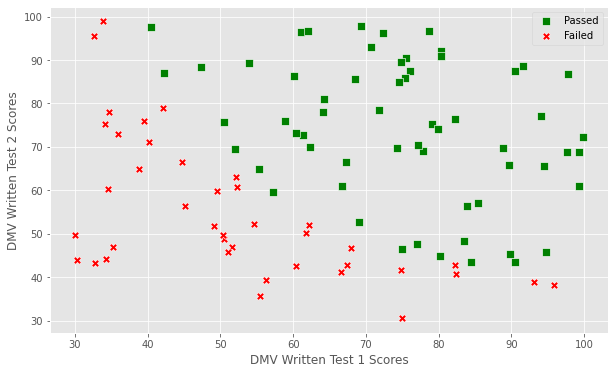

In [126]:
passed = (y == 1).reshape(100,1)
failed = (y == 0).reshape(100, 1)

ax = sns.scatterplot(x = X[passed[:,0], 0] , y =X[passed[:,0], 1], marker = "s",color = "green",s = 60)

sns.scatterplot(x = X[failed[:,0], 0] , y =X[failed[:,0], 1], marker = "X",color = "red",s = 60)

ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")
ax.legend(["Passed", "Failed"])
plt.show();

In [127]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(f'X_train size: {X_train.shape} \t y_train size: {y_train.shape} \nX_test size: {X_test.shape} \t y_test size: {y_test.shape}')


X_train size: (80, 2) 	 y_train size: (80, 1) 
X_test size: (20, 2) 	 y_test size: (20, 1)


In [128]:
logisticRegression= LogisticRegression(solver='liblinear', C=0.003, multi_class='auto', random_state=0)
logisticRegression.fit(X_train,y_train.ravel())

LogisticRegression(C=0.003, random_state=0, solver='liblinear')

In [129]:
print(f'Accuracy of training set : {logisticRegression.score(X_train,y_train)}')

Accuracy of training set : 0.9125


In [130]:
y_pred = logisticRegression.predict(X_test)
print(f'Accuracy of testing set : {logisticRegression.score(X_test,y_test)}')

Accuracy of testing set : 0.85
